<a href="https://colab.research.google.com/github/mjiii25/22-1_DLAI/blob/main/gilbut_ch3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3

## 3.1 Mechanism of Neural Network

- 'Dense' layer for 2D tensor
- 'LSTM' layer for 3D tensor
- 'Conv2D' layer for 4D tensor

In [ ]:
from keras import layers

In [ ]:
layer = layers.Dense(32, input_shape = (784,))                                    # dense layer with 32 units

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, input_shape = (784,)))
model.add(layers.Dense(10))

Network

Loss Function and Optimizer

## About Keras

1) Sequential model

In [ ]:
from keras import models
from keras import layers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape = (784,)))
model.add(layers.Dense(10, activation = 'softmax'))

2) Functional API

In [ ]:
input_tensor = layers.Input(shape = (784,))
x = layers.Dense(32, activation = 'relu')(input_tensor)
output_tensor = layers.Dense(10, activation = 'softmax')(x)

model = models.Model(inputs = input_tensor, outputs = output_tensor)

Compile

In [ ]:
from keras import optimizers

# model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
#               loss = 'mse',
#               metrics = ['accuracy'])

## Movie Review Classification (binary classification)

In [3]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
                                                        num_words = 10000)        # 10000 most frequent words

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [5]:
train_data.shape

(25000,)

In [6]:
train_labels.shape

(25000,)

In [4]:
max([max(sequence) for sequence in train_data])                                   # Not over 9999 since 10000 words

9999

How to change these data to the original words?

In [ ]:
word_index = imdb.get_word_index()                                                # dictionary of (word,integer index)
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()]                           # return (integer index, word)
)
decoded_review = ''.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]                   # remove non-review index
)

Prepare data
- using one-hot encoding

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))                                 # zero matrix with size of (len(sequences), dimension)
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [15]:
y_train[0]

1.0

In [16]:
y_test[0]

0.0

Building our Neural Network model

In [18]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [19]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',                                       # 'binary_crossentropy' since binary classification processs & sigmoid = probability
              metrics = ['accuracy'])

In [ ]:
# from keras.backend import binary_crossentropy
# ## optimizer의 매개변수를 바꿀 경우
# optimizer = optimizers.RMSprop(lr = 0.001)

# ## 자신만의 loss function, 측정 함수 전달하는 경우
# loss = losses,binary_crossentropy,
# metrics = [metrics.binary_accuracy]

- binary classification(이중분류) : binary_accuracy
- multi-class binary classification(다중분류) : categorical_accuracy

Training validation

In [8]:
## Validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Compile and fit

In [22]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 25ms/step - loss: 0.2003 - accuracy: 0.9277 - val_loss: 0.2726 - val_accuracy: 0.8917
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1510 - accuracy: 0.9501 - val_loss: 0.2792 - val_accuracy: 0.8879
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1258 - accuracy: 0.9595 - val_loss: 0.2886 - val_accuracy: 0.8871
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1017 - accuracy: 0.9693 - val_loss: 0.3041 - val_accuracy: 0.8855
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0852 - accuracy: 0.9756 - val_loss: 0.3282 - val_accuracy: 0.8823
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0720 - accuracy: 0.9797 - val_loss: 0.3535 - val_accuracy: 0.8786
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0586 - accuracy: 0.9849 - val_loss: 0.4033 - val_accuracy: 0.8671
Epoch 8/20
30

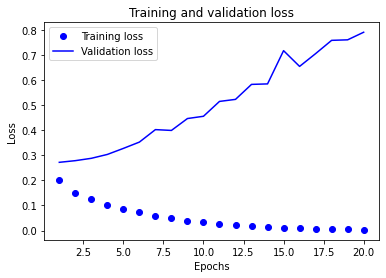

In [23]:
## Visualize loss

import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

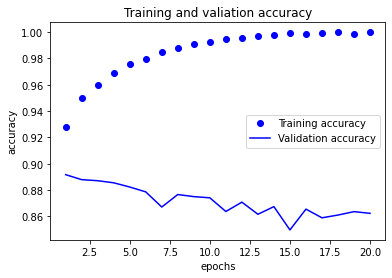

In [26]:
## Visualize accuracy

plt.clf()                                                                         # clear the plot
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and valiation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

- training loss decreases and training accuracy increases as epoch goes up.
- poor validation loss, maybe overfitted

train with training data (not validation set)

In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train,
          y_train,
          epochs = 4,
          batch_size = 512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 18ms/step - loss: 0.4489 - accuracy: 0.8271
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2557 - accuracy: 0.9097
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.1980 - accuracy: 0.9293
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.3063 - accuracy: 0.8789


In [15]:
results                                                                           # (loss, accuracy)

[0.3062753975391388, 0.8788800239562988]

Predict

In [16]:
model.predict(x_test)

array([[0.20889874],
       [0.9997372 ],
       [0.73599374],
       ...,
       [0.08719678],
       [0.0403223 ],
       [0.41034093]], dtype=float32)